In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model=keras.Sequential(
[
    layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(10,activation="softmax"),
]
)

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

#scale the images to the [0,2] range
X_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

#add a channel dimension to the shape
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

x_train,x_val=x_train[:50000],x_train[50000:]
y_train,y_val=y_train[:50000],y_train[50000:]

In [4]:
datagen=ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

In [10]:
#without data augmentation
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="accuracy")
history=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_val,y_val))

#with data augmentation
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="accuracy")
history1=model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=5,validation_data=(x_val,y_val))

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0749 - accuracy: 0.9797 - val_loss: 0.1016 - val_accuracy: 0.9774
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0469 - accuracy: 0.9853 - val_loss: 0.1039 - val_accuracy: 0.9783
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.1309 - val_accuracy: 0.9758
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.1499 - val_accuracy: 0.9755
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.1667 - val_accuracy: 0.9759
Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2910 - accuracy: 0.9148 - val_loss: 0.1711 - val_accuracy: 0.9617
Epoch 2/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.2213 - accuracy: 0.9344 - val_loss: 0.1983 - val_accurac

In [11]:
#without data augmentation
model.evaluate(x_test,y_test)

#with data augmentation
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 6.8198 - accuracy: 0.1135


[6.81979513168335, 0.11349999904632568]

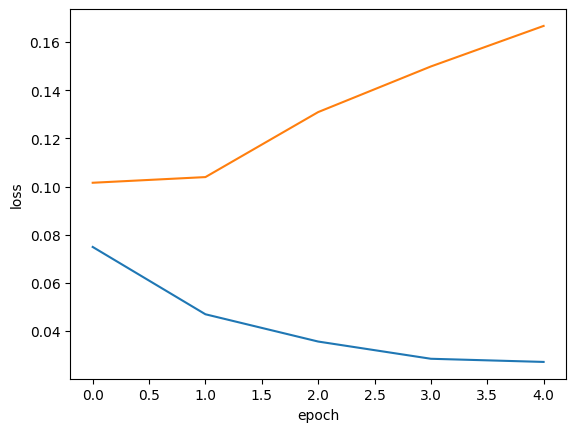

In [12]:
import matplotlib.pyplot as plt
#plot the training and validation loss
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

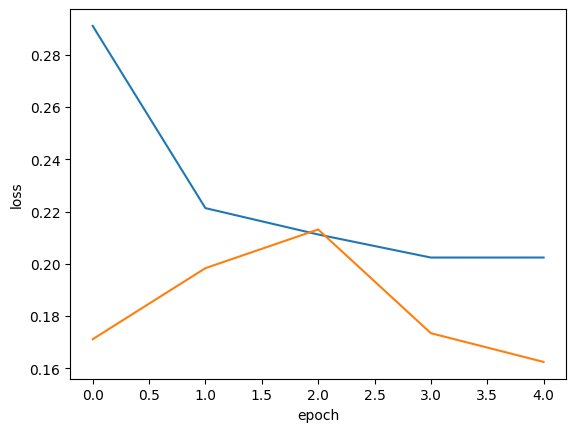

In [13]:
import matplotlib.pyplot as plt
#plot the training and validation loss
plt.plot(history1.history['loss'],label='training loss')
plt.plot(history1.history['val_loss'],label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()